# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques

Nous avons dans le dossier datasets/SalesAnalysis des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



J'ai fait cette analyse en regardant la video Youtube de Kevin Degila
 https://www.youtube.com/watch?v=bSnDlvJWed8&list=PL049bGjkT7dLJo748aOvXnUg0YtR1tacv&index=33

# Importons nos données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

Jetons un coup d'oeil à la data du mois d'Avril

In [2]:
april_sales = pd.read_csv("https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

In [3]:
april_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
april_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


In [5]:
april_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
april_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


# Merger la data

In [7]:
mois = ["January", "February", "March", "April", "May", "June", "July", "August",
        "September", "October", "November", "December"]

files = [f"https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv" for month in mois]

In [8]:
files

['https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_January_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_June_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_July_2019.csv',
 'https://raw.githubusercontent.com/kevindegila/data-analyst/main/datasets/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 'https://raw.

In [9]:
df = pd.DataFrame()

for lien in files:
  data_interm = pd.read_csv(lien)
  df = pd.concat([df, data_interm])

In [10]:
df.shape

(186850, 6)

In [11]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Nettoyage des données

In [13]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


Toutes les lignes ont-elles des valeurs manquantes?

In [15]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Supprimer toutes les lignes ayant des valeurs manquantes

In [16]:
df.shape

(186850, 6)

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(186305, 6)

In [19]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [20]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [21]:
"1548".isdigit()

True

In [22]:
df.loc[~df['Order Date'].str.isdigit(), :]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [23]:
# df.drop(df['Order Date'] == "Order Date")

In [24]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [26]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), :]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement de type

In [27]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [28]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [29]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int64  
 3   Price Each        182735 non-null  float64
 4   Order Date        182735 non-null  object 
 5   Purchase Address  182735 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ MB


In [31]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [33]:
df['Order Date']

0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
25112    12/11/19 20:58
25113    12/01/19 12:01
25114    12/09/19 06:43
25115    12/03/19 10:39
25116    12/21/19 21:45
Name: Order Date, Length: 186305, dtype: object

In [34]:
df_clean['Order Date']

0       2019-01-22 21:25:00
1       2019-01-28 14:15:00
2       2019-01-17 13:33:00
3       2019-01-05 20:33:00
4       2019-01-25 11:59:00
                ...        
25112   2019-12-11 20:58:00
25113   2019-12-01 12:01:00
25114   2019-12-09 06:43:00
25115   2019-12-03 10:39:00
25116   2019-12-21 21:45:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

#Analyse exploratoire proprement dite

##Quel est le meilleur mois de vente?
##Quel est le chiffre d'affaires de ce mois?

In [35]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [36]:
df_clean.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25107, 25108, 25109, 25110, 25111, 25112, 25113, 25114, 25115,
            25116],
           dtype='int64', length=182735)

In [37]:
 df_clean = df_clean.set_index('Order Date')

In [38]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215"
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035"
2019-01-17 13:33:00,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016"
2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001"
2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301"


In [39]:
df_clean.sort_index(inplace=True)

In [40]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [41]:
df_clean['Month'] = df_clean.index.month_name()

In [42]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [75]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [76]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-12-08 17:51:00,309139,ThinkPad Laptop,1,999.99,"807 River St, Boston, MA 02215",December,999.99,Boston,17,17:51:00
2019-07-04 16:39:00,230528,Wired Headphones,1,11.99,"752 Elm St, Austin, TX 73301",July,11.99,Austin,16,16:39:00
2019-05-12 06:22:00,203329,USB-C Charging Cable,1,11.95,"383 12th St, San Francisco, CA 94016",May,11.95,San Francisco,6,06:22:00
2019-04-12 11:33:00,177696,AA Batteries (4-pack),2,3.84,"330 Meadow St, San Francisco, CA 94016",April,7.68,San Francisco,11,11:33:00
2019-05-07 09:10:00,204450,Bose SoundSport Headphones,1,99.99,"632 13th St, Los Angeles, CA 90001",May,99.99,Los Angeles,9,09:10:00


In [77]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: chiffre_daffaire, dtype: float64

In [78]:
 order = ["January", "February", "March", "April", "May", "June", "July", "August",
        "September", "October", "November", "December"]

In [79]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: chiffre_daffaire, dtype: float64

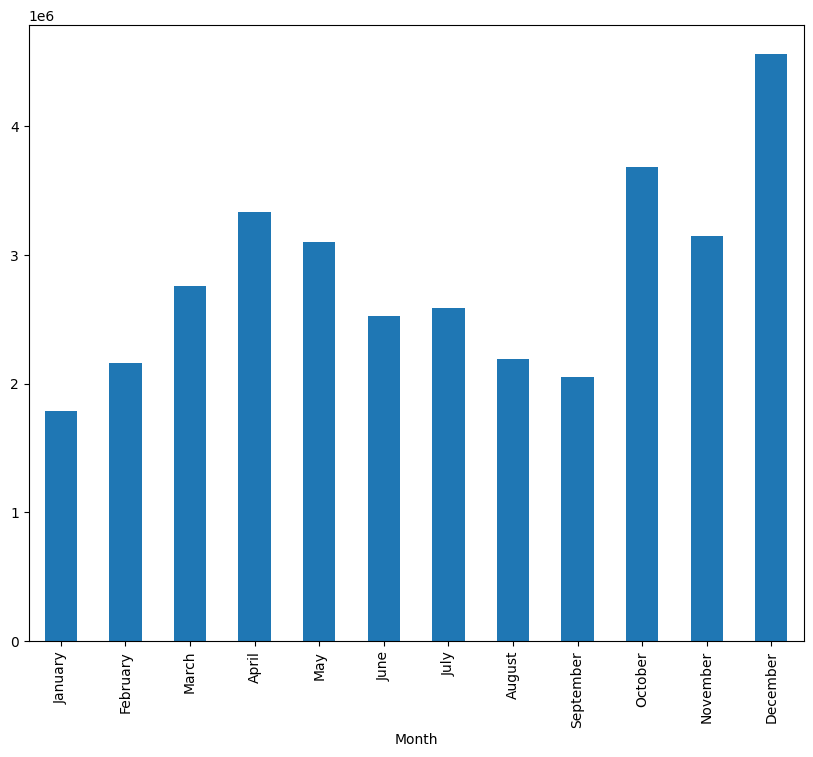

In [80]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8));

In [81]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

<ipython-input-81-035356477bb8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December


4557905.42

Decembre est le mois avec le plus de vente et le CA est 4557905.42 .

#Dans quelle ville a-t-on vendu le plus de produits?

In [82]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [83]:
'731 7th St, New York City, NY 10001'.split(',')[1]

' New York City'

In [84]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [85]:
get_ville("731 7th St, New York City, NY 10001")

'New York City'

In [86]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [87]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-08-21 23:47:00,243219,AA Batteries (4-pack),1,3.84,"6 11th St, Austin, TX 73301",August,3.84,Austin,23,23:47:00
2019-02-22 15:58:00,157787,Lightning Charging Cable,1,14.95,"227 Sunset St, Portland, OR 97035",February,14.95,Portland,15,15:58:00
2019-03-18 22:54:00,169494,AA Batteries (4-pack),2,3.84,"23 West St, Seattle, WA 98101",March,7.68,Seattle,22,22:54:00
2019-03-18 00:42:00,170632,Wired Headphones,1,11.99,"551 Madison St, New York City, NY 10001",March,11.99,New York City,0,00:42:00
2019-03-18 11:07:00,162018,USB-C Charging Cable,2,11.95,"925 Maple St, Portland, OR 97035",March,23.90,Portland,11,11:07:00


In [88]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [89]:
 df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

<ipython-input-89-d878945ebddd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)


ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: chiffre_daffaire, dtype: float64

<ipython-input-90-fe43e201282b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10,8))


<Axes: ylabel='ville'>

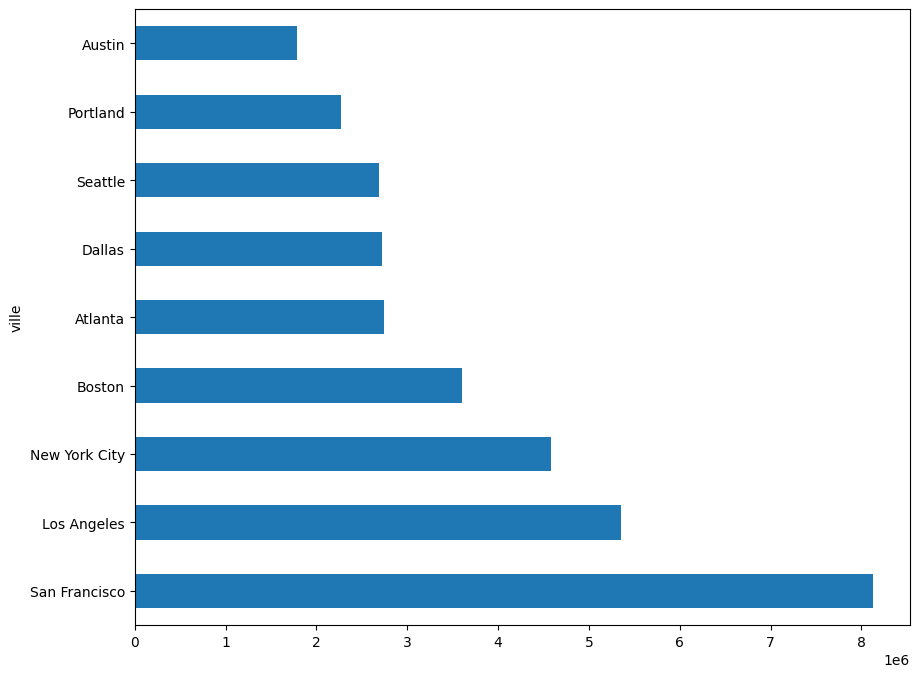

In [90]:
 df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10,8))

On a fait un meilleur chiffre d'affaire à San Franscisco .

# A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

A quelle heure vend-on le plus?

In [91]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time


In [92]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [93]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [98]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [101]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [99]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


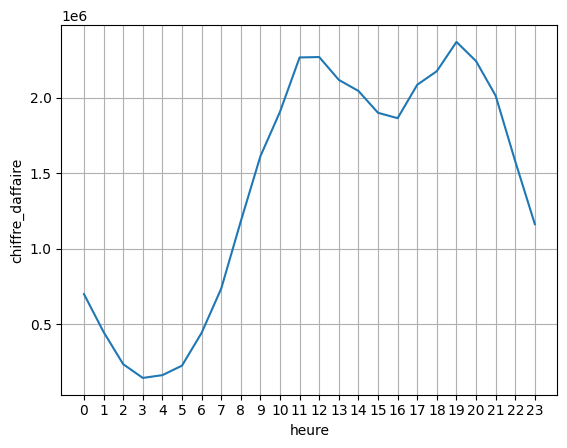

In [102]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.grid()
plt.show()

On devrait afficher la publicité entre 10 et 11h, entre 18 et 19h puisque ce sont les moments où nous avons le plus d'influence

# Quels sont les produits achetés ensembles?

Les produits vendus ensemble ont le meme **Order ID**

In [103]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


Les ventes avec le plus de produits.

In [105]:
df_clean['Order ID'].duplicated()

Order Date
2019-01-01 03:07:00    False
2019-01-01 03:40:00    False
2019-01-01 04:56:00    False
2019-01-01 05:53:00    False
2019-01-01 06:03:00    False
                       ...  
2020-01-01 04:13:00    False
2020-01-01 04:21:00    False
2020-01-01 04:54:00    False
2020-01-01 05:13:00    False
2020-01-01 05:13:00     True
Name: Order ID, Length: 182735, dtype: bool

In [106]:
df_m  = df_clean[df_clean["Order ID"].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",January,11.99,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",January,700.00,New York City,7,07:29:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",January,600.00,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",January,11.95,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",January,700.00,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",January,150.00,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",January,29.90,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",January,700.00,New York City,0,00:22:00


In [107]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [110]:
df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Wired Headphones;Vareebadd Phone
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Wired Headphones;Macbook Pro Laptop
319556                      Google Phone;Wired Headphones
319584                            iPhone;Wired Headphones
319596                    Lightning Charging Cable;iPhone
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 6928, dtype: object

In [111]:
ensemble = df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [113]:
from itertools import combinations
from collections import Counter

count = Counter()

In [114]:
list(combinations(['a', 'c', 'b', 'e'], 2))

[('a', 'c', 'b'), ('a', 'c', 'e'), ('a', 'b', 'e'), ('c', 'b', 'e')]

In [116]:
Counter(combinations(['a', 'c', 'b', 'e'], 2))

Counter({('a', 'c'): 1,
         ('a', 'b'): 1,
         ('a', 'e'): 1,
         ('c', 'b'): 1,
         ('c', 'e'): 1,
         ('b', 'e'): 1})

In [117]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'Apple Airpods Headphones;iPhone',
 'Google Phone;Apple Airpods Headphones',
 'iPhone;Apple Airpods Headphones;Wired Headphones',
 'Apple Airpods Headphones;USB-C Charging Cable',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 '27in FHD Monitor;Bose SoundSport Headphones',
 'USB-C Charging Cable;Google Phone',
 'Wired Headphones;iPhone',
 'Google Phone;USB-C Charging Cable',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Lightning Charging Cable;Bose SoundSport Headphones',
 'Wired Headphones;Google Phone',
 'Wired

In [119]:
for achat in ensemble.to_list():
  products = achat.split(";")

  print(products)
  count.update(Counter(combinations(products, 2)))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
['iPhone', 'Wired Headphones']
['Lightning Charging Cable', 'Apple Airpods Headphones']
['27in 4K Gaming Monitor', 'AA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'AAA Batteries (4-pack)']
['iPhone', 'AA Batteries (4-pack)']
['Apple Airpods Headphones', 'iPhone', 'Lightning Charging Cable']
['Bose SoundSport Headphones', 'iPhone']
['Lightning Charging Cable', 'Lightning Charging Cable']
['USB-C Charging Cable', 'AA Batteries (4-pack)']
['Lightning Charging Cable', 'iPhone']
['Bose SoundSport Headphones', 'Apple Airpods Headphones']
['Wired Headphones', 'Flatscreen TV']
['USB-C Charging Cable', 'Vareebadd Phone']
['USB-C Charging Cable', '34in Ultrawide Monitor']
['iPhone', 'Apple Airpods Headphones']
['Bose SoundSport Headphones', 'Google Phone']
['Lightning Charging Cable', 'iPhone']
['USB-C Charging Cable', 'Google Phone']
['USB-C Charging Cable', '20in Monitor']
['27in FH

In [120]:
count

Counter({('USB-C Charging Cable', 'Wired Headphones'): 102,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 37,
         ('Wired Headphones', 'Vareebadd Phone'): 82,
         ('USB-C Charging Cable', 'Google Phone'): 474,
         ('Bose SoundSport Headphones', 'Google Phone'): 115,
         ('Apple Airpods Headphones', 'iPhone'): 159,
         ('Google Phone', 'Apple Airpods Headphones'): 11,
         ('iPhone', 'Apple Airpods Headphones'): 196,
         ('iPhone', 'Wired Headphones'): 236,
         ('Apple Airpods Headphones', 'Wired Headphones'): 48,
         ('Apple Airpods Headphones', 'USB-C Charging Cable'): 24,
         ('Wired Headphones', 'Lightning Charging Cable'): 70,
         ('iPhone', 'Lightning Charging Cable'): 509,
         ('27in FHD Monitor', 'Bose SoundSport Headphones'): 13,
         ('Wired Headphones', 'iPhone'): 216,
         ('Google Phone', 'USB-C Charging Cable'): 492,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 45,
       

In [121]:
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 509)]

In [123]:
for ensemble, c in count.most_common(10):
  print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 509
('Google Phone', 'USB-C Charging Cable') 492
('USB-C Charging Cable', 'Google Phone') 474
('Lightning Charging Cable', 'iPhone') 474
('iPhone', 'Wired Headphones') 236
('Wired Headphones', 'iPhone') 216
('Wired Headphones', 'Google Phone') 215
('iPhone', 'Apple Airpods Headphones') 196
('Google Phone', 'Wired Headphones') 195
('Vareebadd Phone', 'USB-C Charging Cable') 188


# Produit le plus vendu

In [124]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [126]:
df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64